In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("C://Users//thinkpad//Desktop//project//financial_transactions.csv")

# Convert transaction_date to datetime
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Display dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      1000 non-null   int64         
 1   account_id          1000 non-null   int64         
 2   transaction_amount  1000 non-null   float64       
 3   transaction_date    1000 non-null   datetime64[ns]
 4   transaction_type    1000 non-null   object        
 5   location            1000 non-null   object        
 6   customer_age        1000 non-null   int64         
 7   fraud_flag          1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 62.6+ KB
None
   transaction_id  account_id  transaction_amount transaction_date  \
0               1        4174             2762.42       2023-01-01   
1               2        4507              832.52       2023-01-02   
2               3        1860         

In [3]:
df

,transaction_id,account_id,transaction_amount,transaction_date,transaction_type,location,customer_age,fraud_flag
0,1,4174,2762.42,2023-01-01,Credit,Germany,60,0
1,2,4507,832.52,2023-01-02,Transfer,India,69,0
2,3,1860,2062.16,2023-01-03,Transfer,UK,52,0
3,4,2294,3890.24,2023-01-04,Transfer,UK,57,0
4,5,2130,2407.05,2023-01-05,Transfer,UK,31,1
...,...,...,...,...,...,...,...,...
995,996,3497,1977.88,2025-09-22,Transfer,Germany,43,0
996,997,1009,2751.58,2025-09-23,Debit,Germany,47,0
997,998,3871,3736.91,2025-09-24,Debit,Canada,34,0
998,999,1797,3580.30,2025-09-25,Debit,USA,37,0


In [5]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB 487.6 kB/s eta 0:00:33
    --------------------------------------- 0.3/16.1 MB 2.5 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/16.1 MB 5.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/16.1 MB 7.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.2/16.1 MB 7.8 MB/s eta 0:00:02
   ------ --------------------------------- 2.8/16.1 MB 8.6 MB/s eta 0:00:02
   ------- -------------------------------- 3.1/16.1 MB 8.7 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/16.1 MB 8.6 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.1 MB 9.3 MB/s eta 0:00:02
   ------------ --------------------------- 4.8/16.1 MB 9.6 MB/s eta 0:00:02
   ------------- -------------------------- 5.4/16.1 MB 9.9 MB/s eta 0:00:02
   --------

In [1]:
import sqlite3
import pandas as pd

In [3]:
# Connect to SQLite database (or MySQL, change connection accordingly)
conn = sqlite3.connect("financial_audit.db")  # This will create a local database
cursor = conn.cursor()

# Create table for financial transactions
cursor.execute("""
CREATE TABLE IF NOT EXISTS financial_transactions (
    transaction_id INTEGER PRIMARY KEY,
    account_id INTEGER,
    transaction_amount REAL,
    transaction_date TEXT,
    transaction_type TEXT,
    location TEXT,
    customer_age INTEGER,
    fraud_flag INTEGER
);
""")
conn.commit()

# Load data from CSV into database
df = pd.read_csv("C://Users//thinkpad//Desktop//project//financial_transactions.csv")
df.to_sql("financial_transactions", conn, if_exists="replace", index=False)

1000

In [5]:
query = """
SELECT transaction_id, account_id, transaction_amount, transaction_date, fraud_flag
FROM financial_transactions
WHERE transaction_amount > 4000 OR fraud_flag = 1
ORDER BY transaction_amount DESC;
"""

# Execute query and load results into DataFrame
high_risk_df = pd.read_sql_query(query, conn)

# Display results
print(high_risk_df.head())

   transaction_id  account_id  transaction_amount transaction_date  fraud_flag
0             503        2895             4996.77       2024-05-17           0
1             247        3680             4988.49       2023-09-04           0
2             163        1779             4986.31       2023-06-12           0
3             596        2129             4981.72       2024-08-18           0
4             955        4479             4966.75       2025-08-12           0


In [7]:
print(high_risk_df.count())

transaction_id        230
account_id            230
transaction_amount    230
transaction_date      230
fraud_flag            230
dtype: int64


In [9]:
query = """
SELECT location, COUNT(*) AS high_risk_count
FROM financial_transactions
WHERE fraud_flag = 1 OR transaction_amount > 4000
GROUP BY location
ORDER BY high_risk_count DESC;
"""

# Execute query
location_risk_df = pd.read_sql_query(query, conn)
print(location_risk_df)

  location  high_risk_count
0       UK               56
1      USA               55
2    India               47
3  Germany               37
4   Canada               35


In [11]:
query = """
SELECT account_id, AVG(transaction_amount) AS avg_transaction
FROM financial_transactions
GROUP BY account_id
HAVING avg_transaction > 2000
ORDER BY avg_transaction DESC;
"""

avg_transaction_df = pd.read_sql_query(query, conn)
print(avg_transaction_df)

     account_id  avg_transaction
0          3680          4988.49
1          1779          4986.31
2          4479          4966.75
3          3532          4954.74
4          2015          4950.84
..          ...              ...
562        1160          2018.72
563        4051          2013.89
564        3660          2006.76
565        3613          2002.67
566        2827          2001.24

[567 rows x 2 columns]


In [13]:
conn.close()
print("Database connection closed.")

Database connection closed.


In [15]:
df

,transaction_id,account_id,transaction_amount,transaction_date,transaction_type,location,customer_age,fraud_flag
0,1,4174,2762.42,2023-01-01,Credit,Germany,60,0
1,2,4507,832.52,2023-01-02,Transfer,India,69,0
2,3,1860,2062.16,2023-01-03,Transfer,UK,52,0
3,4,2294,3890.24,2023-01-04,Transfer,UK,57,0
4,5,2130,2407.05,2023-01-05,Transfer,UK,31,1
...,...,...,...,...,...,...,...,...
995,996,3497,1977.88,2025-09-22,Transfer,Germany,43,0
996,997,1009,2751.58,2025-09-23,Debit,Germany,47,0
997,998,3871,3736.91,2025-09-24,Debit,Canada,34,0
998,999,1797,3580.30,2025-09-25,Debit,USA,37,0


In [17]:
from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
features = ["transaction_amount", "customer_age"]
model = IsolationForest(contamination=0.05, random_state=42)

# Train model and assign anomaly scores
df["risk_score"] = model.fit_predict(df[features])

# Convert risk scores: -1 (anomaly) → High Risk, 1 → Low Risk
df["risk_score"] = df["risk_score"].apply(lambda x: "High Risk" if x == -1 else "Low Risk")

# Display high-risk transactions
high_risk_transactions = df[df["risk_score"] == "High Risk"]
print(high_risk_transactions.head())

    transaction_id  account_id  transaction_amount transaction_date  \
5                6        2095             4926.58       2023-01-06   
11              12        2238              326.92       2023-01-12   
31              32        2184              244.01       2023-02-01   
70              71        1241             1053.56       2023-03-12   
83              84        1775             4865.82       2023-03-25   

   transaction_type location  customer_age  fraud_flag risk_score  
5            Credit  Germany            75           0  High Risk  
11           Credit       UK            21           0  High Risk  
31           Credit      USA            79           0  High Risk  
70            Debit   Canada            79           0  High Risk  
83            Debit      USA            22           0  High Risk  


In [19]:
def check_compliance(row):
    if row["transaction_amount"] > 4000:  # High-value transaction check
        return "SOX Violation"
    elif row["fraud_flag"] == 1:  # Identified fraud
        return "Fraud Alert"
    else:
        return "Compliant"

# Apply compliance rules
df["compliance_status"] = df.apply(check_compliance, axis=1)

# Display non-compliant transactions
non_compliant = df[df["compliance_status"] != "Compliant"]
print(non_compliant.head())

    transaction_id  account_id  transaction_amount transaction_date  \
4                5        2130             2407.05       2023-01-05   
5                6        2095             4926.58       2023-01-06   
9               10        3169             4147.53       2023-01-10   
19              20        1130             4566.70       2023-01-20   
29              30        1955             4392.32       2023-01-30   

   transaction_type location  customer_age  fraud_flag risk_score  \
4          Transfer       UK            31           1   Low Risk   
5            Credit  Germany            75           0  High Risk   
9          Transfer      USA            78           0   Low Risk   
19            Debit      USA            66           0   Low Risk   
29           Credit      USA            30           0   Low Risk   

   compliance_status  
4        Fraud Alert  
5      SOX Violation  
9      SOX Violation  
19     SOX Violation  
29     SOX Violation  


In [21]:
df

,transaction_id,account_id,transaction_amount,transaction_date,transaction_type,location,customer_age,fraud_flag,risk_score,compliance_status
0,1,4174,2762.42,2023-01-01,Credit,Germany,60,0,Low Risk,Compliant
1,2,4507,832.52,2023-01-02,Transfer,India,69,0,Low Risk,Compliant
2,3,1860,2062.16,2023-01-03,Transfer,UK,52,0,Low Risk,Compliant
3,4,2294,3890.24,2023-01-04,Transfer,UK,57,0,Low Risk,Compliant
4,5,2130,2407.05,2023-01-05,Transfer,UK,31,1,Low Risk,Fraud Alert
...,...,...,...,...,...,...,...,...,...,...
995,996,3497,1977.88,2025-09-22,Transfer,Germany,43,0,Low Risk,Compliant
996,997,1009,2751.58,2025-09-23,Debit,Germany,47,0,Low Risk,Compliant
997,998,3871,3736.91,2025-09-24,Debit,Canada,34,0,Low Risk,Compliant
998,999,1797,3580.30,2025-09-25,Debit,USA,37,0,Low Risk,Compliant


In [29]:
df[df.fraud_flag==1]

,transaction_id,account_id,transaction_amount,transaction_date,transaction_type,location,customer_age,fraud_flag,risk_score,compliance_status
4,5,2130,2407.05,2023-01-05,Transfer,UK,31,1,Low Risk,Fraud Alert
34,35,1021,2495.84,2023-02-04,Transfer,UK,29,1,Low Risk,Fraud Alert
47,48,2806,4027.17,2023-02-17,Transfer,USA,39,1,Low Risk,SOX Violation
52,53,1562,3186.86,2023-02-22,Transfer,UK,24,1,Low Risk,Fraud Alert
67,68,1600,238.85,2023-03-09,Credit,Germany,50,1,Low Risk,Fraud Alert
75,76,3945,2927.98,2023-03-17,Transfer,USA,29,1,Low Risk,Fraud Alert
104,105,1201,4342.82,2023-04-15,Credit,Canada,71,1,Low Risk,SOX Violation
127,128,1763,2824.19,2023-05-08,Credit,Canada,19,1,Low Risk,Fraud Alert
174,175,3773,4194.53,2023-06-24,Credit,Germany,64,1,Low Risk,SOX Violation
228,229,2051,2703.51,2023-08-17,Debit,USA,18,1,Low Risk,Fraud Alert


In [31]:
df.to_csv("C://Users//thinkpad//Desktop//project//processed_financial_transactions.csv", index=False)

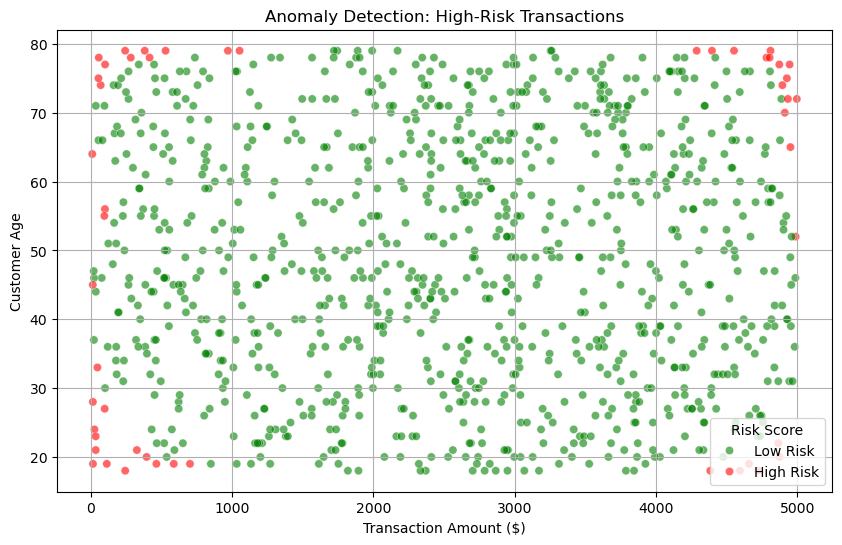

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df["transaction_amount"], 
    y=df["customer_age"], 
    hue=df["risk_score"], 
    palette={"High Risk": "red", "Low Risk": "green"}, 
    alpha=0.6
)

# Titles and labels
plt.title("Anomaly Detection: High-Risk Transactions")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Customer Age")
plt.legend(title="Risk Score")
plt.grid(True)

# Show plot
plt.show()


In [37]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [39]:

from sqlalchemy import create_engine

# Create a database connection
engine = create_engine("sqlite:///financial_audit.db", echo=False)

# Load data into a new SQL table
df.to_sql("processed_transactions", engine, if_exists="replace", index=False)

print("✅ Processed Data Loaded into SQL Database")


✅ Processed Data Loaded into SQL Database
